In [101]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import sys
sys.path.append('..')

from libka import *

In [102]:
df_charge = pd.read_csv("in/CH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")

df_charge 

,t,U
0,0.0,2.643127
1,20.0,2.749939
2,40.0,2.803345
3,60.0,2.845764
4,80.0,2.881775
...,...,...
1911,38220.0,4.198608
1912,38240.0,4.199219
1913,38260.0,4.199829
1914,38280.0,4.200134


In [103]:
# moj sposob
II = 0.18 # charge and discharge current
dU = []
dt = []

integral = 0

for i in range(0, len(df_charge["U"])-1):
    dU.append((df_charge["U"][i+1]+df_charge["U"][i])/2)
    dt.append((df_charge["t"][i+1]-df_charge["t"][i]))


# print(len(dU))

for i in range(0, len(dU)):
    integral += dU[i]*dt[i]*II
    # integral += dU[i]*0.36
    # integral += dch["U"][i]*0.36

integral

53237.20523324404

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


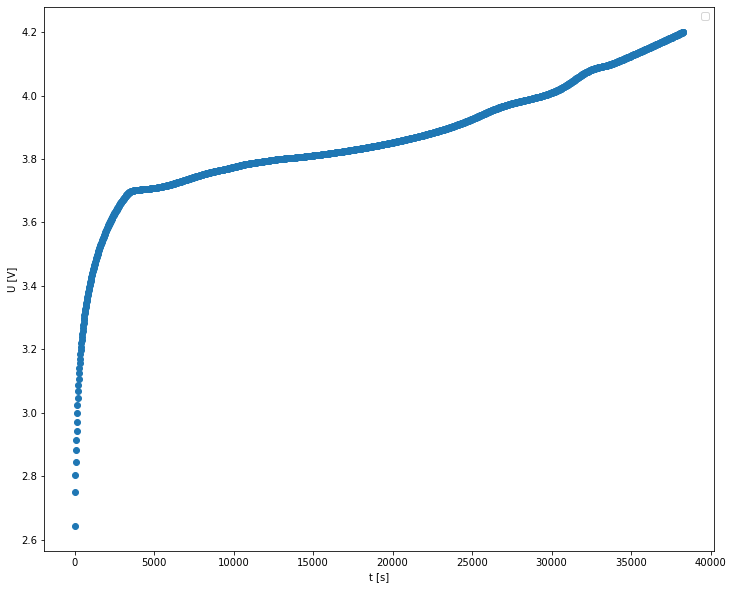

In [104]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df_charge["t"], df_charge["U"], 'o', label="")
ax.set_xlabel("t [s]")
ax.set_ylabel("U [V]")
ax.legend()
plt.savefig("out/ch0.jpg")
plt.show()

In [105]:
df_discharge = pd.read_csv("in/DCH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")

In [106]:
# moj sposob
dU = []
dt = []

integral = 0

for i in range(0, len(df_discharge["U"])-1):
    dU.append((df_discharge["U"][i+1]+df_discharge["U"][i])/2)
    dt.append((df_discharge["t"][i+1]-df_discharge["t"][i]))


# print(len(dU))

for i in range(0, len(dU)):
    integral += dU[i]*dt[i]*II
    # integral += dU[i]*0.36
    # integral += dch["U"][i]*0.36

integral

52706.94796763992

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


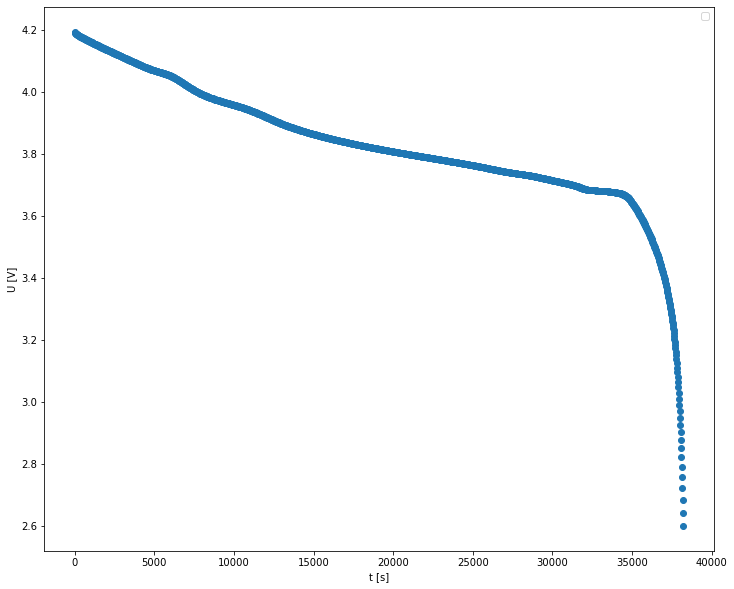

In [107]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df_discharge["t"], df_discharge["U"], 'o', label="")
ax.set_xlabel("t [s]")
ax.set_ylabel("U [V]")
ax.legend()

plt.savefig("out/dch0.jpg")
plt.show()